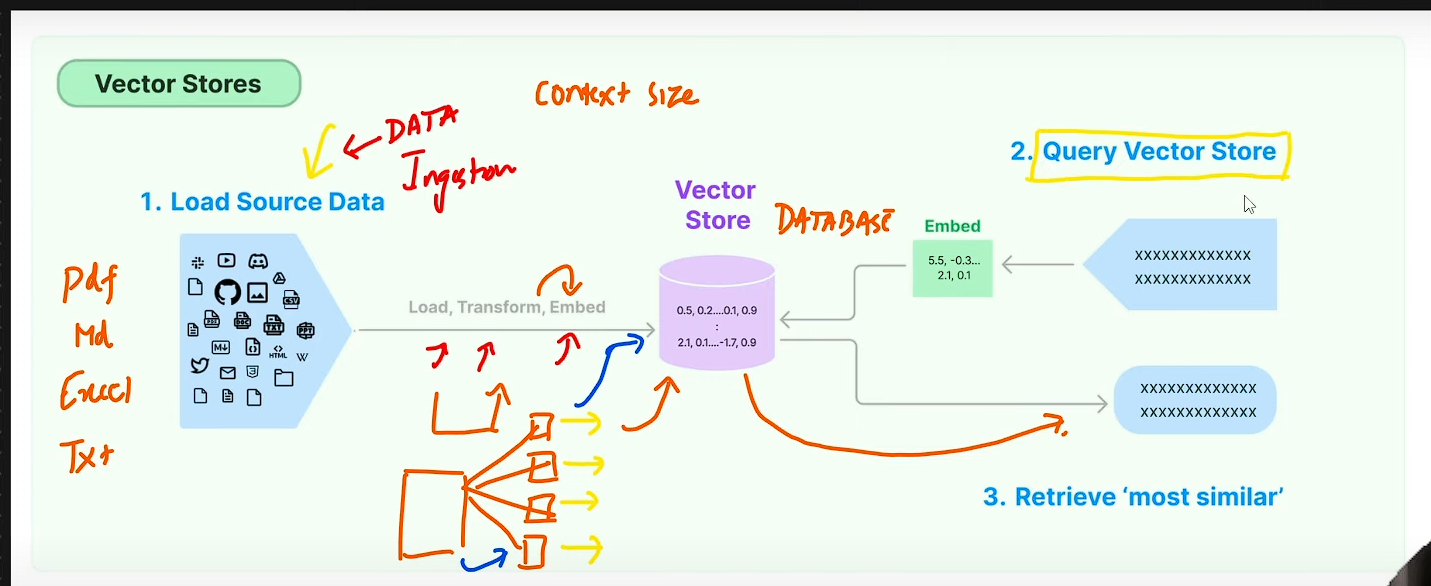

# 1. Data Ingestion (Data Loading)

In [38]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.schema import Document

# List of PDF files
pdf_files = [
    "data/Handout 1.1 (Lab Environment Setup).pdf",
    "data/Handout 1.2 (Recap of OS with Linux) (1).pdf",
    "data/Handout 1.3 (Recap of InterNetworking Concepts with Linux) (1).pdf",
    "data/Handout 2.1 (Ethical Hacking Pentesting and Anonymity).pdf",
    "data/Handout 2.2 (Reconnaissance Info Gathering and OSINT).pdf",
    "data/Handout 2.3 (Scanning and Vulnerability Analysis - I).pdf",
    "data/Handout 2.4 (Scanning and Vulnerability Analysis - II).pdf",
    "data/Handout 2.5 (Exploitation and Gaining Access).pdf",
    "data/Handout 2.6 (Generating your own Payloads).pdf",
    "data/Handout 2.7 (Privilege Escalation).pdf"
]

In [39]:

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,  
    chunk_overlap=50
)


# 2. Vector Storing

In [40]:

all_documents = []

for pdf_file in pdf_files:
    loader = PyPDFLoader(pdf_file)
    pages = loader.load()  
    
    combined_text = " ".join(page.page_content for page in pages)
    chunks = text_splitter.split_text(combined_text)
    
    documents = [Document(page_content=chunk, metadata={"source": pdf_file}) for chunk in chunks]
    all_documents.extend(documents)

Ignoring wrong pointing object 15 0 (offset 0)
Ignoring wrong pointing object 21 0 (offset 0)
Ignoring wrong pointing object 23 0 (offset 0)
Ignoring wrong pointing object 43 0 (offset 0)
Ignoring wrong pointing object 58 0 (offset 0)
Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 13 0 (offset 0)
Ignoring wrong pointing object 15 0 (offset 0)
Ignoring wrong pointing object 18 0 (offset 0)
Ignoring wrong pointing object 20 0 (offset 0)
Ignoring wrong pointing object 23 0 (offset 0)
Ignoring wrong pointing object 34 0 (offset 0)
Ignoring wrong pointing object 36 0 (offset 0)
Ignoring wrong pointing object 38 0 (offset 0)
Ignoring wrong pointing object 78 0 (offset 0)
Ignoring wrong pointing object 82 0 (offset 0)
Ignoring wrong pointing object 90 0 (offset 0)
Ignoring wrong pointing object 92 0 (offset 0)
Ignoring wrong pointing object 94 0 (offset 0)
Ignoring wrong pointing object 96 0 (offset 0)
Ignoring wrong 

In [41]:
combined_docs = " ".join(doc.page_content for doc in all_documents)

for doc in all_documents:
    print(doc.page_content)
    print(doc.metadata)

Department of Computer Science  FC College University Department of Data Science  University of the Punjab
{'source': 'data/Handout 1.1 (Lab Environment Setup).pdf'}
HO#1.1: Setting-up the Lab Environment Overview and Options for setting-up a Virtual Hacking Lab Dear Students, when it comes to setting up a test lab for learning Networking and Cybersecurity
{'source': 'data/Handout 1.1 (Lab Environment Setup).pdf'}
lab for learning Networking and Cybersecurity concepts, you need to have a network of multiple machines running different Operating Systems and services. This is required to have one or more
{'source': 'data/Handout 1.1 (Lab Environment Setup).pdf'}
services. This is required to have one or more attacking machine and some victim/target machines. From the attacking machines you can scan for vulnerabilities and later exploit them to gain access
{'source': 'data/Handout 1.1 (Lab Environment Setup).pdf'}
and later exploit them to gain access and later perform privilege escalation

In [42]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')


In [43]:
len(documents)

189

In [44]:
from langchain_community.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma

embedding_model = OpenAIEmbeddings()

db = Chroma.from_documents(documents, embedding_model)


In [45]:
db

In [46]:
query = "tools for network mapping?"
result = db.similarity_search(query)
result[0].page_content

'with the target to gather information, such as pinging the network, or using tools like nmap for network mapping. Tools: • Netdiscover • TraceRoute • Host, nslookup, dig  • Whois • Whatweb •'

In [47]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = "gpt-3.5-turbo")
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x000001208AEE2AE0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x00000120888D8890>, root_client=<openai.OpenAI object at 0x000001208AA25E50>, root_async_client=<openai.AsyncOpenAI object at 0x000001208AEE0C50>, model_kwargs={}, openai_api_key=SecretStr('**********'))

In [48]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context. 
Think step by step before providing a detailed answer. 
I will tip you $1000 if the user finds the answer helpful.
But generate response in more human friendly statements. 
<context>
{context}
</context>
Question: {input}""")

In [49]:
from langchain.chains.combine_documents import create_stuff_documents_chain

document_chain = create_stuff_documents_chain(llm, prompt)

In [50]:
retriever=db.as_retriever()
retriever

VectorStoreRetriever(tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000001208ADDAD20>, search_kwargs={})

In [51]:
from langchain.chains import create_retrieval_chain
retrieval_chain=create_retrieval_chain(retriever,document_chain)

In [52]:
response=retrieval_chain.invoke({"input":"nmap -f <IP_address>. What does -f do? Tell me in one line."})

In [53]:
response['answer']

'The command "nmap -f <IP_address>" in Nmap uses fragmentation to evade detection by firewalls and intrusion detection systems.'